# Tensor-Flow Problem Sheet
### Emerging Technologies - Patrick Moran - g00179039


# 1. Use Tensorflow to create model
Code adapted from [salmanahmad4u](https://github.com/salmanahmad4u/keras-iris/blob/master/iris_nn.py) and [emerging-technologies](https://github.com/emerging-technologies/keras-iris/blob/master/iris_nn.py)

In [1]:
# Imports
%matplotlib inline
import numpy as np
import keras as k
import csv
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16.0,8.0) # Make the figures a bit larger


Using TensorFlow backend.


RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

In [2]:
# Load the Iris dataset using pythons csv reading classes
iris = list(csv.reader(open('iris.csv'), delimiter=','))

In [3]:
# Our imputs are: sepal length, sepal width, petal length, petal width as floats.
inputs = np.array(iris)[:,:4].astype(np.float)

# Our outputs are:  setosa, versicolor or virginica (Strings)
outputs = np.array(iris)[:,4]

# 2. Split the data into training and testing

In [4]:
# Convert the output strings to ints.
outputs_vals, outputs_ints = np.unique(outputs, return_inverse=True)

# Encode the category integers as binary categorical vairables using to_categorical.
# [1,0,0] is setosa [0,1,0] is versicolor and [0,0,1] is virginica
outputs_cats = k.utils.to_categorical(outputs_ints)

# 1. Generate a random permutation of the 150 input numbers
rand_perm_nums = np.random.permutation(len(inputs))

# 2. Spilt them into to: 75 for training and 75 for testing
train_nums, test_nums = np.array_split(rand_perm_nums, 2)

# 3. Split the input and output data sets into training and test subsets.
inputs_train, outputs_train = inputs[train_nums], outputs_cats[train_nums]
inputs_test,  outputs_test  = inputs[test_nums],  outputs_cats[test_nums]

## Create a Neural Network

In [5]:
# Create a neural network.
# Create a model with a linear stack of layers
model = k.models.Sequential()

# Add an initial layer with 4 input nodes, and a hidden layer with 24 nodes.
model.add(k.layers.Dense(16, input_shape=(4,)))
# Apply the relu activation function to that layer.
model.add(k.layers.Activation("tanh"))
#model.add(k.layers.Dense(32, activation="relu"))

# Add another layer, connected to the layer with 24 nodes, containing three output nodes.
model.add(k.layers.Dense(3))
# Use the softmax activation function there.
model.add(k.layers.Activation("softmax"))


# 3. Train the model

In [6]:
# Configure the model for training.
# Uses the adam optimizer and categorical cross entropy as the loss function.
# Add in some extra metrics - accuracy being the only one.
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# 4. Test the model

In [7]:
# Fit the model using our training data.
history = model.fit(inputs_train, outputs_train, epochs=120, batch_size=1, verbose=1, validation_data=(inputs_test, outputs_test))

# Evaluate the model using the test data set.
loss, accuracy = model.evaluate(inputs_test, outputs_test, verbose=1)

Train on 75 samples, validate on 75 samples
Epoch 1/120
75/75 [==============================] - 1s 19ms/step - loss: 0.9001 - acc: 0.5467 - val_loss: 0.8055 - val_acc: 0.9067
Epoch 2/120
75/75 [==============================] - 0s 6ms/step - loss: 0.7481 - acc: 0.9067 - val_loss: 0.6688 - val_acc: 0.9467
Epoch 3/120
75/75 [==============================] - 0s 5ms/step - loss: 0.6346 - acc: 0.9600 - val_loss: 0.5750 - val_acc: 0.9467
Epoch 4/120
75/75 [==============================] - 0s 5ms/step - loss: 0.5499 - acc: 0.9200 - val_loss: 0.5003 - val_acc: 0.9733
Epoch 5/120
75/75 [==============================] - 0s 5ms/step - loss: 0.4993 - acc: 0.9067 - val_loss: 0.4596 - val_acc: 0.9733
Epoch 6/120
75/75 [==============================] - 0s 6ms/step - loss: 0.4635 - acc: 0.9333 - val_loss: 0.4380 - val_acc: 0.9200
Epoch 7/120
75/75 [==============================] - 0s 5ms/step - loss: 0.4296 - acc: 0.9733 - val_loss: 0.4019 - val_acc: 0.9867
Epoch 8/120
75/75 [===================

75/75 [==============================] - 0s 5ms/step - loss: 0.1167 - acc: 0.9467 - val_loss: 0.0906 - val_acc: 0.9867
Epoch 63/120
75/75 [==============================] - 0s 5ms/step - loss: 0.1208 - acc: 0.9467 - val_loss: 0.0926 - val_acc: 0.9733
Epoch 64/120
75/75 [==============================] - 0s 6ms/step - loss: 0.1105 - acc: 0.9467 - val_loss: 0.0951 - val_acc: 0.9733
Epoch 65/120
75/75 [==============================] - 0s 5ms/step - loss: 0.1045 - acc: 0.9467 - val_loss: 0.0723 - val_acc: 1.0000
Epoch 66/120
75/75 [==============================] - 0s 5ms/step - loss: 0.1139 - acc: 0.9600 - val_loss: 0.0728 - val_acc: 1.0000
Epoch 67/120
75/75 [==============================] - 0s 6ms/step - loss: 0.1062 - acc: 0.9600 - val_loss: 0.0704 - val_acc: 1.0000
Epoch 68/120
75/75 [==============================] - 0s 5ms/step - loss: 0.1064 - acc: 0.9467 - val_loss: 0.0748 - val_acc: 1.0000
Epoch 69/120
75/75 [==============================] - 0s 5ms/step - loss: 0.1155 - acc: 0

## Display Model Accuracy and Error Rate

In [8]:
# Output the accuracy of the model.
print("\n\nLoss: %6.4f\tAccuracy: %6.4f" % (loss, accuracy))



Loss: 0.0484	Accuracy: 1.0000


# Display Results Graphically
Code Adapted from: http://www.codesofinterest.com/2017/03/graph-model-training-history-keras.html

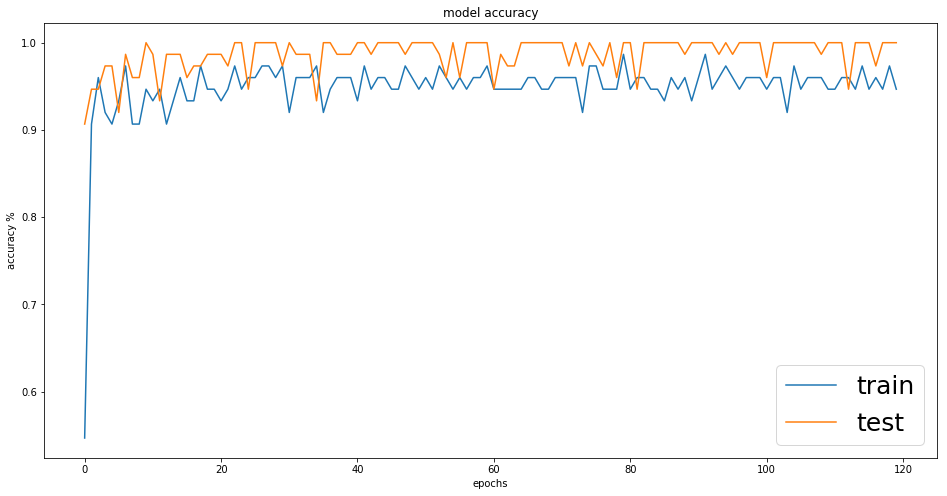

In [9]:
# Summarize History for Accuracy
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy %')  
plt.xlabel('epochs')  
plt.legend(['train', 'test'], loc='lower right', fontsize=25)  

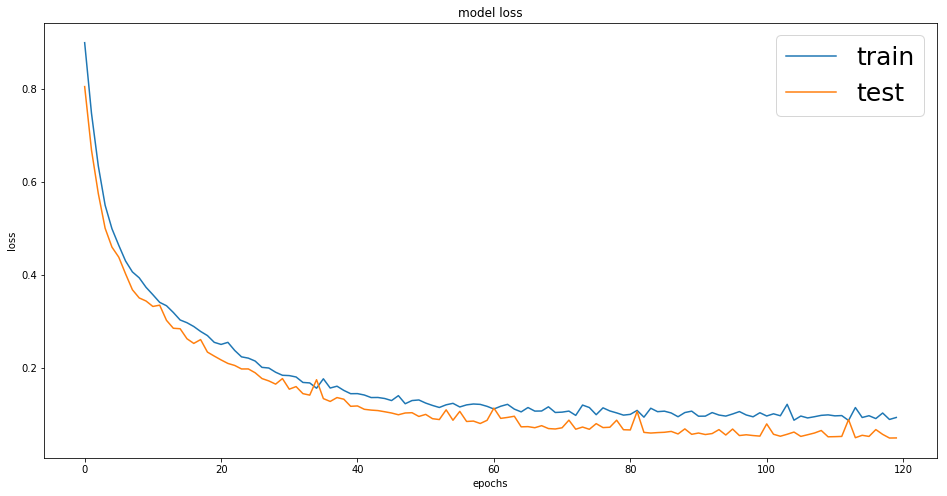

In [10]:
# Summarize history for loss     
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epochs')  
plt.legend(['train', 'test'], loc='upper right', fontsize=25)  
plt.show()  